# Lesson 3: Basic Python for Data Analytics (Stocks Prediction)

# Introduction of Pandas


pandas is a DataFrame Framework, a library that stores data in a highly efficient spreadsheet format and functions.
Efficient in:
1. Data Structure (numpy)
2. Computing time (since DataFrame is processed by C++, it runs in a well streamlined computing environment)
3. Highly optimized and updated processes


[For more details of numpy](https://en.wikipedia.org/wiki/NumPy)

[For more details of pandas cookbook and 10 minutes basic](http://pandas.pydata.org/pandas-docs/stable/10min.html)

## Objective

* To use pandas to load the latest updated data from Yahoo Finance
* To explore and understand the dataset 
    * Viewing the data
    * Correlation Analysis
    * Graphing using matplotlib
* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)
* Comparing models and discuss improvements
* Challenges:
    * Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
    * Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
    * Cleaning out the data
    * Importing data files
* Next lesson:
    * Lesson 4 Basic Python for Data Analytics (Predicting Employee Retention)

## Loading YahooFinance Dataset

In this demonstration, we will use pandas web data reader. This is an extension of pandas library to communicate with most updated financial data. 

This will include sources as:
* Yahoo! Finance
* Google Finance
* Enigma
* FRED
* Fama/French
* World Bank
* OECD
* Eurostat
* EDGAR Index
* TSP Fund Data
* Oanda currency historical rate
* Nasdaq Trader Symbol Definitions

[For more details of pandas webreader](https://pandas-datareader.readthedocs.io/en/latest/)  

In [305]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,115.919998,116.860001,115.809998,116.610001,22103700,116.610001
2017-01-06,116.779999,118.160004,116.470001,117.910004,31577900,117.910004
2017-01-09,117.949997,119.430000,117.940002,118.989998,33387600,118.989998
2017-01-10,118.769997,119.379997,118.300003,119.110001,24420800,119.110001
2017-01-11,118.739998,119.930000,118.599998,119.750000,27418600,119.750000


Get the dimension of dataframe

In [306]:
df.shape

(1769, 6)

## Exploring the data 

First we will need to explore the data.
This means understanding the stocks data trend thoroughly by finding key measures
* rolling mean (moving average) -- to determine trend
* return deviation -- to determine return deviation

[For more details of rolling mean](http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp) 


In [307]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2016-12-28    111.508340
2016-12-29    111.597476
2016-12-30    111.673134
2017-01-03    111.760151
2017-01-04    111.846564
2017-01-05    111.936389
2017-01-06    112.026282
2017-01-09    112.127969
2017-01-10    112.232448
2017-01-11    112.344720
Name: Adj Close, dtype: float64

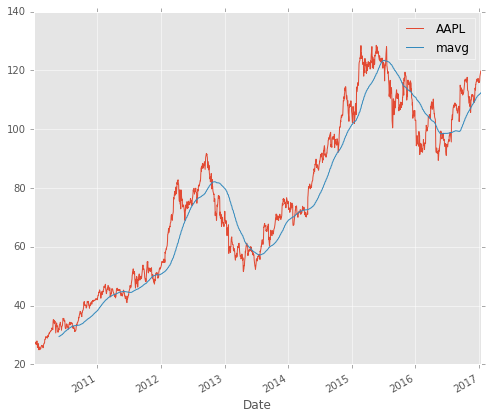

In [308]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [309]:
rets = close_px / close_px.shift(1) - 1
rets.head()

# close_px.pct_change().head()

Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
Name: Adj Close, dtype: float64

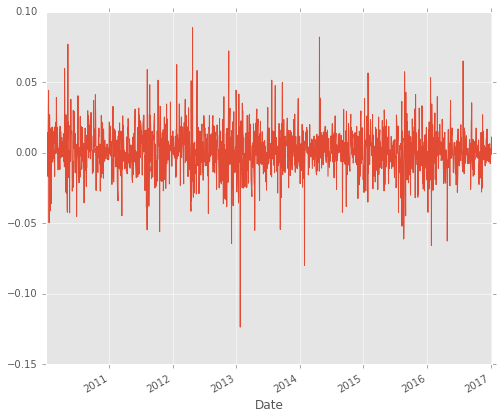

In [310]:
rets.plot(label='return')

## Doing the competitor analysis/Correlation

1. How does one company perform in relative with its competitor
2. What are the correlations among these companies

In [311]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',
                               start=start, 
                               end=end)['Adj Close']
dfcomp.tail()

,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-05,116.610001,31.520000,794.020020,168.699997,62.299999
2017-01-06,117.910004,31.610001,806.150024,169.529999,62.840000
2017-01-09,118.989998,31.459999,806.650024,167.649994,62.639999
2017-01-10,119.110001,31.370001,804.789978,165.520004,62.619999
2017-01-11,119.750000,31.469999,807.909973,167.750000,63.189999


Get the dimension of dataframes

In [312]:
dfcomp.shape

(1769, 5)

In [313]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

,AAPL,GE,GOOG,IBM,MSFT
AAPL,1.000000,0.381502,0.411549,0.383906,0.393467
GE,0.381502,1.000000,0.422241,0.535501,0.474070
GOOG,0.411549,0.422241,1.000000,0.402790,0.472016
IBM,0.383906,0.535501,0.402790,1.000000,0.496905
MSFT,0.393467,0.474070,0.472016,0.496905,1.000000


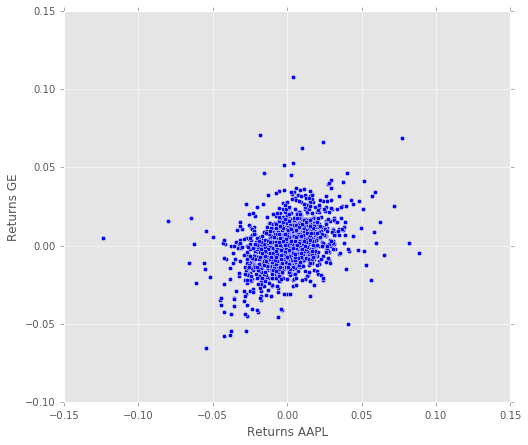

In [314]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

You can do scatter matrix with all the competitors data and find the kde of each m
KDE will determine if your chart is more normally distributed leaning to the 
* left: Returns are more likely to be negative in the long run
* centre: Returns are more likely to be 0 in the long run
* right: Returns are more likely to be positive in the long run

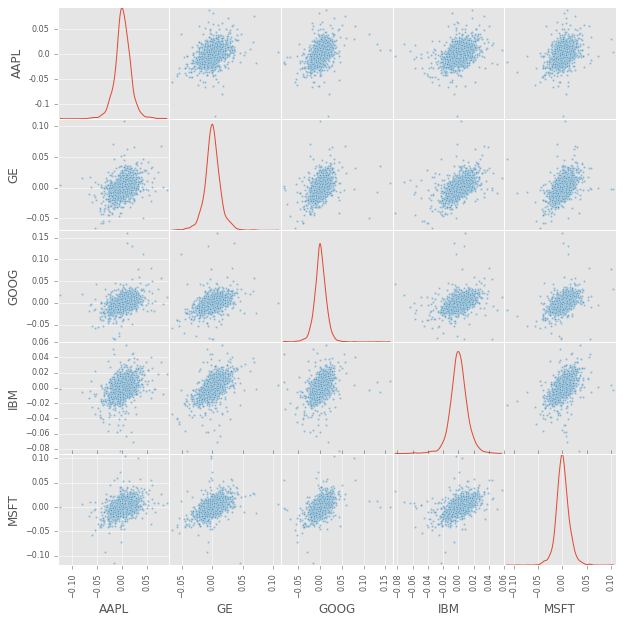

In [315]:
pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

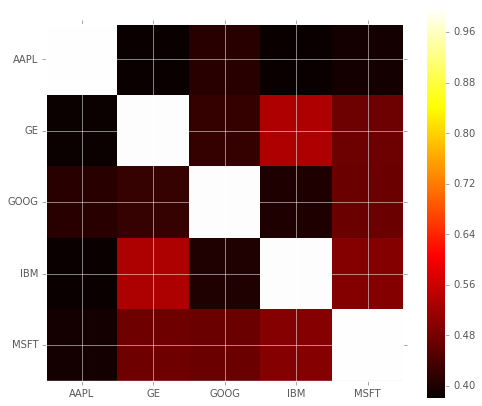

In [316]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

## Stocks mean and Risk calculation
Which stocks are risky and bearing returns

Kurtosis and skewness

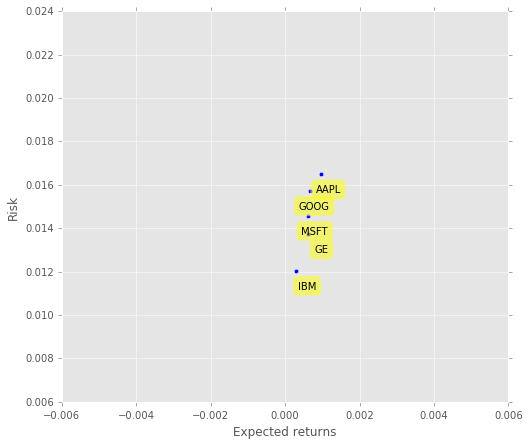

In [317]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Predicting the stocks price

To predict the return of the stocks in the next period - Prediction analysis
* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:
* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [318]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.847252
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106


In [319]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,27.847252,123432400,0.990606,0.271752
2010-01-05,27.895396,150476200,1.091520,-0.102519
2010-01-06,27.451683,138040000,2.123523,-1.590633
2010-01-07,27.400936,119282800,1.400893,-0.552538
2010-01-08,27.583106,111902700,1.386924,0.798864


In [320]:
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm


# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(1769, 4)
('Dimension of X', (1751L, 4L))
('Dimension of y', (1751L,))


In [321]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

# Model Generation

* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)

## Build the model

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

## Test the model

In [323]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

('The linear regression confidence is ', 0.96399641826551985)
('The quadratic regression 2 confidence is ', 0.96492624557970319)
('The quadratic regression 3 confidence is ', 0.9652082834532858)
('The knn regression confidence is ', 0.92844658034790639)


This means that the linear regression holds the most accuracy of it as being linear and justify the trend of stocks as being linear most of the times. 

However this does not mean we can just put stocks in it. There are still many issues to consider, especially with different companies that have different price trajectories over time. Google really is very linear: Up and to the right. Many companies aren't, so keep this in mind. 

We need to plot out the graph to make the most sense of it 

In [324]:
# Printing the forecast
forecast_set = clf.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidence, forecast_out)

(array([ 115.44941187,  115.20206522,  116.78688393,  116.70244946,
        116.58503739,  115.98769407,  116.54315699,  117.40012338,
        117.21473053,  116.57244657,  116.048717  ,  116.26444966,
        115.78374093,  116.50647805,  117.92064806,  118.75581186,
        118.82688731,  119.51873699]), 0.96234891774075604, 18)


# Plotting the Prediction

In [325]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

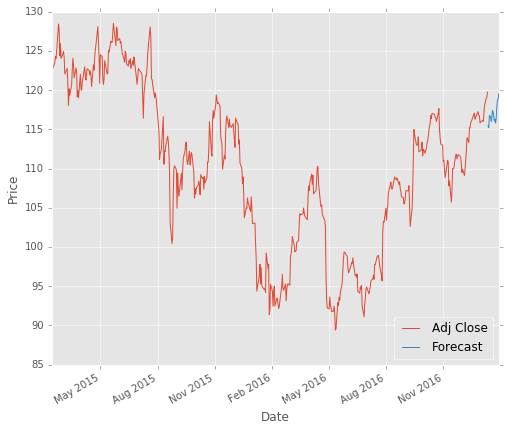

In [326]:
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Challenges (To Be Continued):
* Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
* Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
* Cleaning out the data
* Importing data files

# Next lesson:
## Lesson 4 Basic Python for Data Analytics (Predicting Employee Retention)